# Research Classifiers

#### Init Libraries

In [1]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import os

#### Load Dataset and split into Features and Label

In [2]:
#load data
df=pd.read_csv("breast-cancer-wisconsin-data/data.csv")
#drop irelevent columns for the classification
df = df.drop(columns=['Unnamed: 32', 'id'])
# rearange the data for X - featuers and Y leabels 
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

#### Encode Labels

In [3]:
le = LabelEncoder()
y = le.fit_transform(y)

#### The mapping of the labels

In [4]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'B': 0, 'M': 1}


#### Splitting the data into Train, Test and Valid datasets

In [5]:
#split the data
from sklearn.model_selection import train_test_split
XData_train_val, XData_test, ydata_train_val, ydata_test = train_test_split(X, y, test_size=0.2, random_state=0)
XData_train, XData_val, ydata_train, ydata_val = train_test_split(XData_train_val, ydata_train_val, test_size=0.2, random_state=0)

#### Scale the data

In [6]:
scaler = RobustScaler()
X_train = scaler.fit_transform(XData_train)
X_test = scaler.transform(XData_test)
X_val = scaler.transform(XData_val)

#X_train_val = scaler.fit_transform(XData_train_val)

y_train = ydata_train
y_test = ydata_test
y_val = ydata_val

y_train_val = ydata_train_val

#### Handling the imbalance between the classes

In [7]:
#handling imbalance data 
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
#the class weight is done only on the train data to impact the learning process and to evaluete beter the model proformence
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 0.774468085106383, 1: 1.4108527131782946}

as predicted the minorty class 'M'=1 gets higher weight of 1.411

# Classifiers

##### Init Libraries

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf

### Logistic Regression

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 10, 50, 100, 1000]

LogisticRegression_base = LogisticRegression(random_state=0,class_weight = class_weight_dict)
logisticregression_search = GridSearchCV(
                                        scoring = 'accuracy', 
                                        estimator = LogisticRegression_base,
                                        param_grid = [{
                                            'solver': ['lbfgs', 'liblinear'],
                                            'C': param_range
                                        }],
                                        cv = 5)
logisticregression_search.fit(X_train, y_train)
print(logisticregression_search.best_estimator_)
print(logisticregression_search.best_score_)

logisticregression_best = logisticregression_search.best_estimator_


print(logisticregression_best.score(X_val, y_val))

LogisticRegression(C=0.1,
                   class_weight={0: 0.774468085106383, 1: 1.4108527131782946},
                   random_state=0)
0.9671232876712329
0.978021978021978


In [10]:
LogReg = LogisticRegression(solver='liblinear' , C = 0.1 , penalty = 'l2',random_state=0,class_weight = class_weight_dict)
LogReg.fit(X_train, y_train)
LogReg.score(X_val,y_val)

0.9560439560439561

### Xgboost

In [11]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for   
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 8],
    'n_estimators': [100, 500, 1000],
}

# Create the XGBoost classifier base model
xgb_base = XGBClassifier(random_state=0)

# Perform GridSearchCV with XGBoost
xgb_search = GridSearchCV(
    scoring='accuracy',
    estimator=xgb_base,
    param_grid=param_grid,
    cv=5  # Adjust cv value as needed
)

# Fit the model on training data
xgb_search.fit(X_train, y_train)

# Print best estimator and score
print("Best XGBoost Estimator:", xgb_search.best_estimator_)
print("Best Score:", xgb_search.best_score_)

# Get the best model
xgb_best = xgb_search.best_estimator_

# Evaluate the best model on validation data
print("Validation Score:", xgb_best.score(X_val, y_val))

Best XGBoost Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)
Best Score: 0.9506088280060883
Validation Score: 0.967032967032967


Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
Best XGBoost Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)
              

### SVM

In [12]:
from sklearn.svm import SVC

param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 10, 50, 100, 1000]

SVC_base = SVC(random_state=0,class_weight = class_weight_dict)
SVC_search = GridSearchCV( scoring = 'accuracy', 
                           estimator = SVC_base,
                           param_grid = [{

                                            'kernel' :['rbf', 'sigmoid','linear'],
                                            'C': param_range,
                                            'gamma': param_range

                                        }],
                                        cv = 5)
SVC_search.fit(X_train, y_train)
print(SVC_search.best_estimator_)
print(SVC_search.best_score_)

SVC_best = SVC_search.best_estimator_

print(logisticregression_best.score(X_val, y_val))

SVC(C=50, class_weight={0: 0.774468085106383, 1: 1.4108527131782946},
    gamma=0.001, kernel='sigmoid', random_state=0)
0.9698630136986301
0.978021978021978


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_base = RandomForestClassifier(random_state=0)
RandomForest_search = GridSearchCV( scoring = 'accuracy', 
                           estimator = RandomForest_base,
                           param_grid = [{ 
                                            'n_estimators':[5,10, 20, 45 ],
                                            'max_depth': [2, 5, 8, 20],
                                            'min_samples_split':  [2, 8 , 20],
                                            'min_samples_leaf':[1, 2 ,8,20],
                                            'max_features': [None,'sqrt', 'log2'] ,
                                            'max_leaf_nodes':[None, 2 ,8 ,20],


                                        }],
                                        cv = 5)
RandomForest_search.fit(X_train, y_train)
RandomForest_best = RandomForest_search.best_estimator_
RandomForest_best

d:\Yakir\Development\Python\DL\Breast-Cancer-Prediction\.venv\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=10,
                       random_state=0)

In [27]:
print(f"valid score: {RandomForest_search.best_score_}")
print(f"valid score: {RandomForest_best.score(X_val, y_val)}") 

valid score: 0.9588660578386605
valid score: 0.9230769230769231


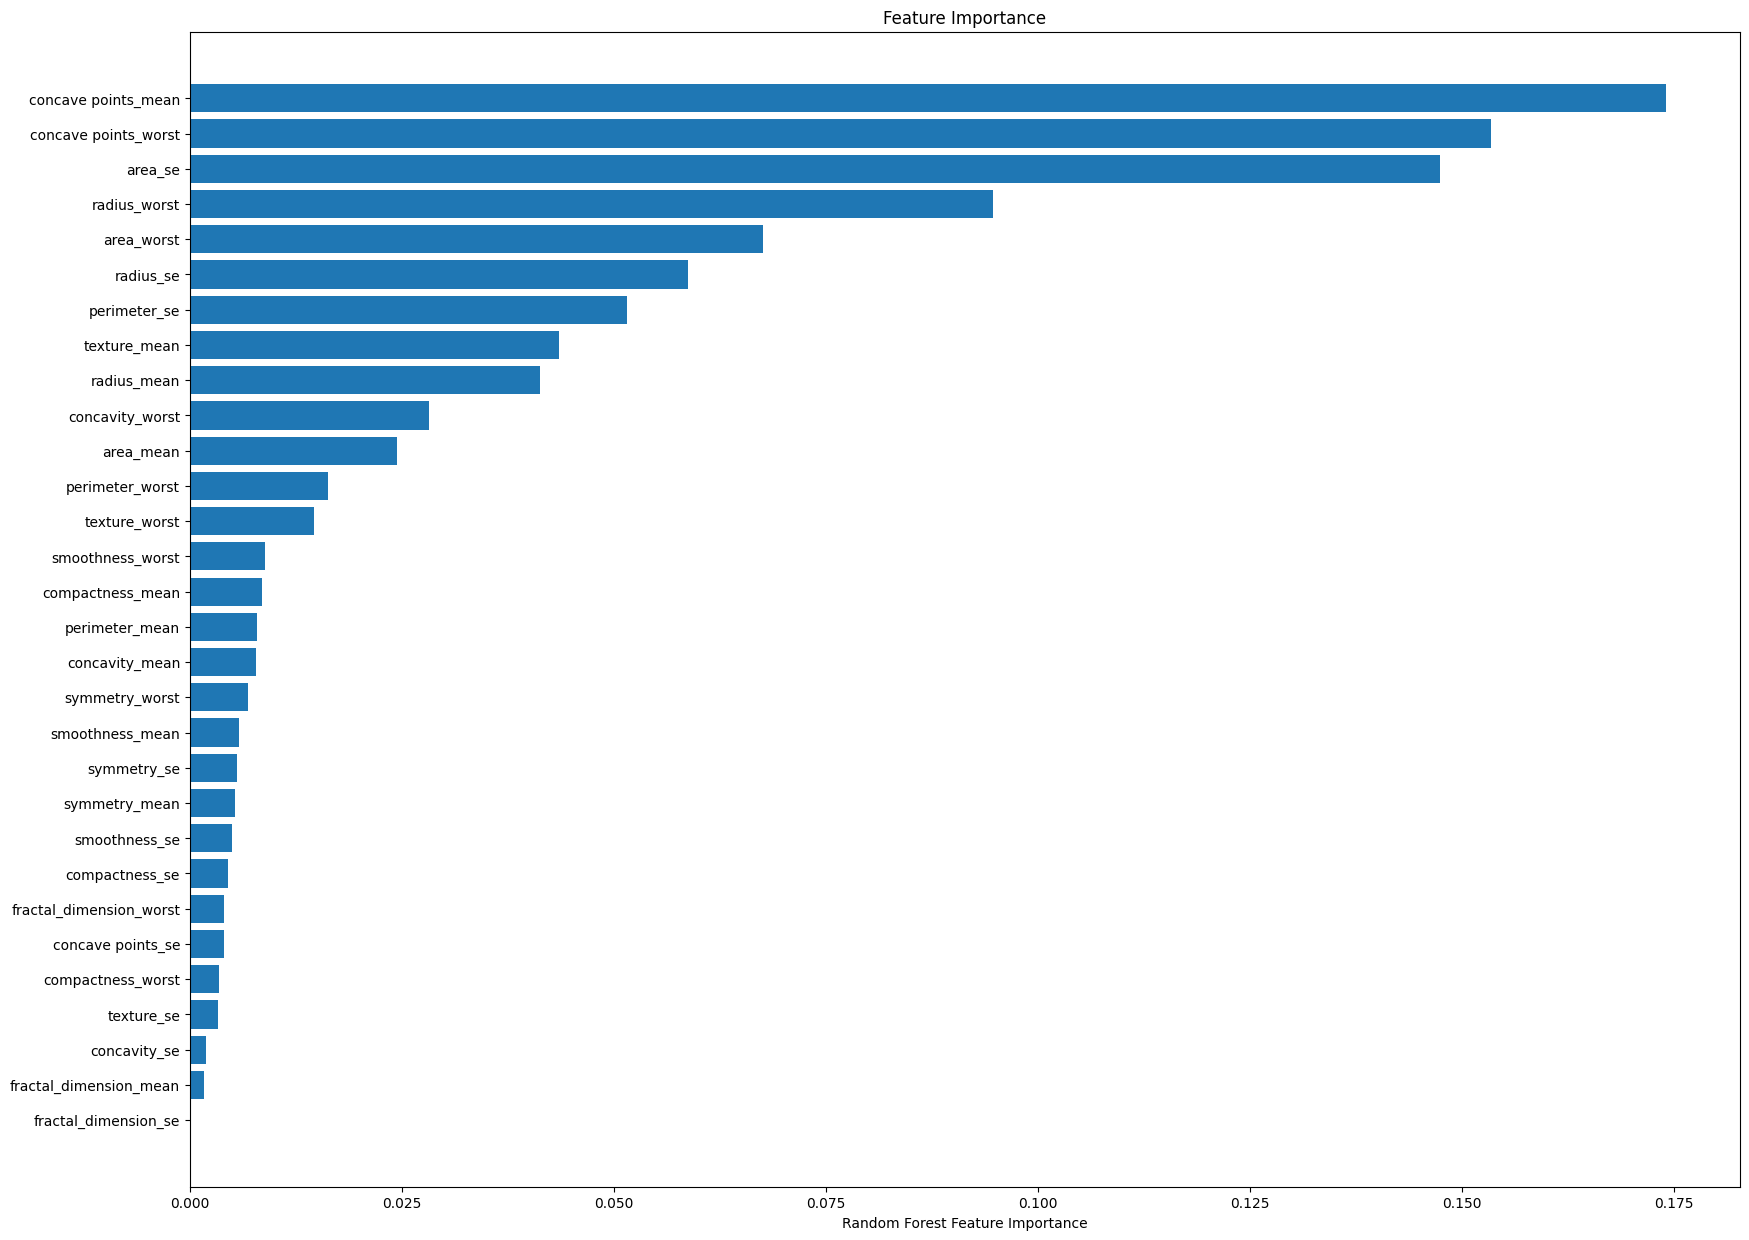

In [28]:
## Checking Feature importance 
feature_col_tree=XData_train.columns.to_list()

plt.figure(figsize=(20,15))
importance = RandomForest_best.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()